In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [ ]:
# Membaca DataFrame dari tautan
url = 'https://raw.githubusercontent.com/delyrafael/TubesMachineLearning/main/dataset_factbook.csv'
df = pd.read_csv(url, delimiter=';')


In [ ]:
# Memilih atribut yang diperlukan
x = df[['Exports', 'Imports', 'Industrial production growth rate', 'Investment', 'Unemployment rate', 'GDP']]

# Memisahkan atribut prediksi (X) dan target (y)
X = x.drop('GDP', axis=1)
y = x['GDP']


In [ ]:
# Normalisasi target (y)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))


In [ ]:
# Melakukan penskalaan fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Mengubah bentuk array target (y)
y_train = y_train.ravel()
y_test = y_test.ravel()

# Membangun model MLP
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', alpha=0.0001,
                   max_iter=1000, random_state=42)

mlp.fit(X_train, y_train)

# Memprediksi GDP pada set pengujian
y_pred = mlp.predict(X_test)

# Menghitung rata-rata galat kuadrat (MSE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


# Print the evaluation metrics
print(f'MSE : {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE : {mae:.4f}')
print(f'R^2 : {r2:.2f}')

MSE : 0.0037
RMSE: 0.0611
MAE : 0.0419
R^2 : 0.85


    Prediksi GDP  Target Aktual
0  -2.541388e+13   1.879000e+12
1   2.095969e+14   3.745000e+14
2   5.349976e+13   1.691000e+13
3  -1.917072e+13   2.757000e+13
4   7.881322e+13   4.835000e+13
5   3.588394e+13   1.505000e+12
6   5.982459e+12   2.123000e+13
7   2.408638e+13   1.234000e+12
8   5.277904e+14   7.262000e+14
9   1.267690e+14   3.162000e+13
10 -1.134036e+13   1.836000e+12
11  3.727912e+13   2.550000e+12
12  2.545404e+13   1.715000e+13
13  3.957345e+13   7.088000e+12
14  1.874340e+13   9.251000e+12
15  3.021770e+13   1.440000e+12
16  5.641294e+13   1.887000e+13


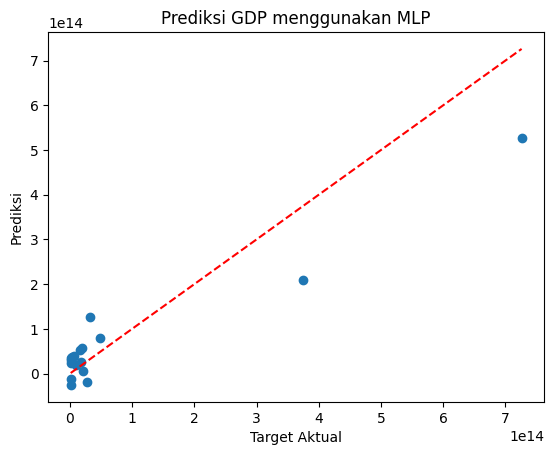

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengembalikan skala awal untuk hasil prediksi dan target aktual
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Menampilkan hasil prediksi GDP
df_pred = pd.DataFrame({'Prediksi GDP': y_pred, 'Target Aktual': y_test})
print(df_pred)

# Visualisasi hasil prediksi dan target aktual menggunakan scatter plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Target Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi GDP menggunakan MLP')
plt.show()